# ANÁLISIS DE EMISIONES DE GEI

In [1]:
# Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [77]:
def graficar(datos, graficas = (1,2), dimfig = (10,5), color = "r", only = False, dev_data = False, coef = []):
    data      = np.asarray(datos)
    dimension = len(data[0][4:])
    indicador = data[0][2].upper()
    year      = np.arange(dimension) + 1960
    
    fig = plt.figure(figsize = dimfig)
    fig.suptitle(f'{indicador}\n\n') 
    fig.subplots_adjust(hspace = 0.5, wspace = 0.5)

    for i in range(1, np.prod(graficas) + 1):
        k = np.random.randint(0, len(data)-1)
        ax = fig.add_subplot(*graficas, i) 
        
        if only:
            ax.set_title("World")
            dat = np.asarray(datos[datos["Country Name"] == "World"])[0][:]
            emisiones = dat[4:]
            
            if len(coef)>0:
                a, b = coef
                f = lambda x : a * x + b
                ax.plot(year, f(year),"k-.")
            
        else:
            emisiones = data[k][4:]
            ax.set_title(f"{data[k][0]}\n")
        
        ax.plot(year, emisiones, f"{color}-")
        ax.set_xlabel("year")
        ax.set_ylabel(f"Emissions (KT)")
    
    plt.show()
    if dev_data:
        return dat

In [78]:
def mundo(file, graf = (1,1), size = (10,5), col = "r", dev_dat = False, ab = []):
    data = pd.read_csv(file).copy()
    dat = graficar(data, graf, size,color = col, only = True, dev_data = dev_dat, coef=ab)
    return dat

In [4]:
# Ejecutar solo una vez!!!!
# Cambio de directorio
directorio = os.getcwd()+"\\Data_Emisiones"
os.chdir(directorio)


In [5]:
files = glob.glob('*.csv')

In [6]:
files

['CH4_eq_CO2_KT.csv',
 'CO2_KT.csv',
 'Combustible_gaseoso.csv',
 'Combustible_liquido.csv',
 'Combustible_solido.csv',
 'HFC_eq_CO2_KT.csv',
 'N2O_eq_CO2_KT.csv']

In [7]:
data = pd.read_csv(files[0]).copy() # copia para evitar modificar los archivos
len(data)

264

## Análisis cualitativo de las tendencias que siguen las emisiones de diferentes paises y/o regiones.

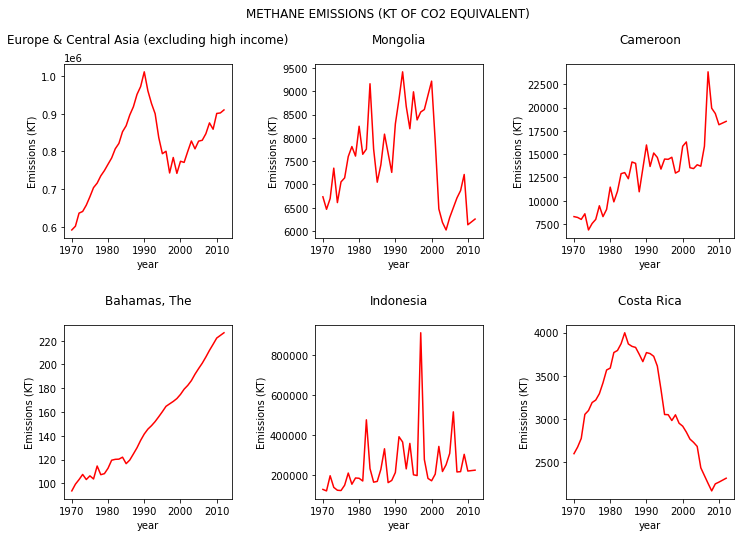

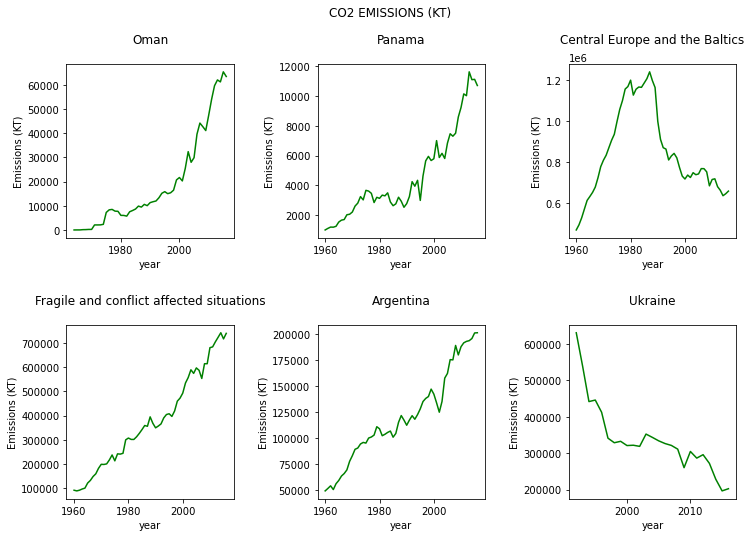

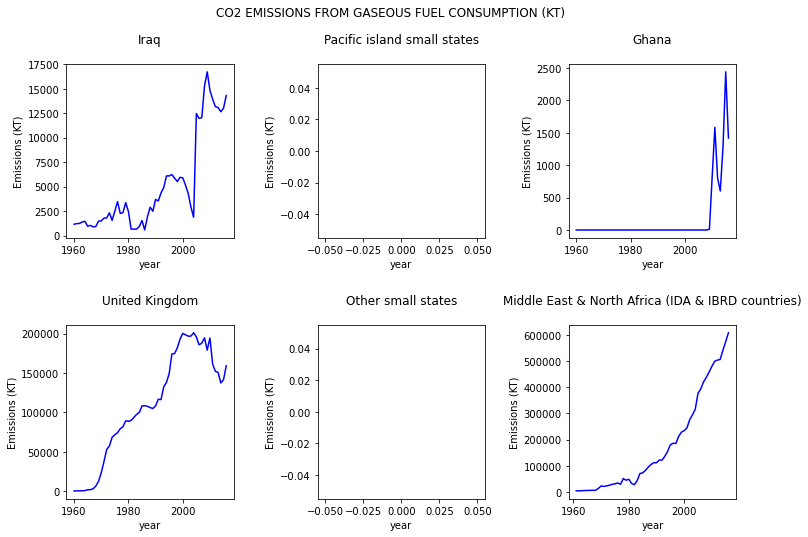

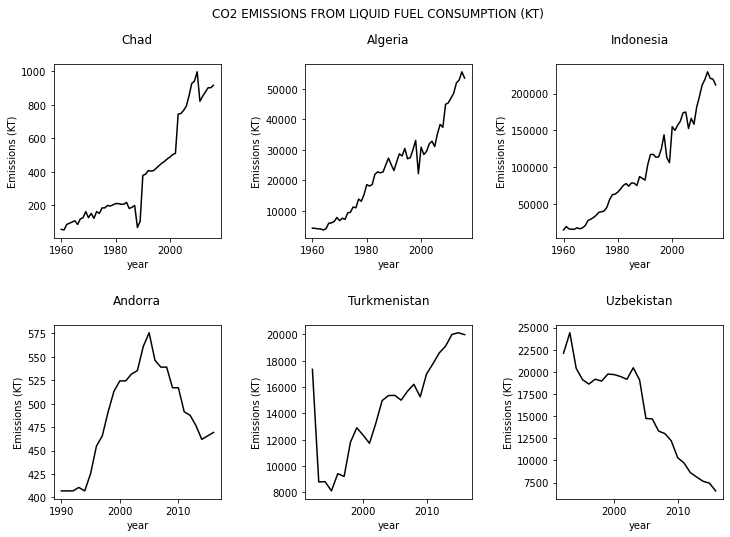

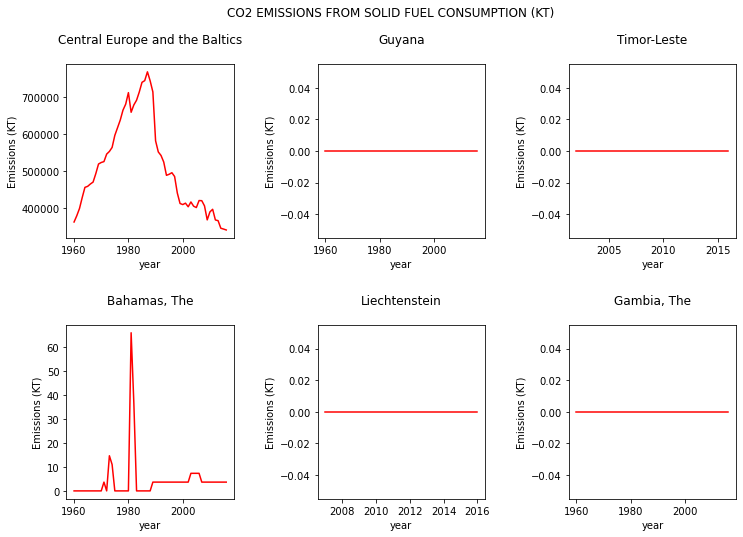

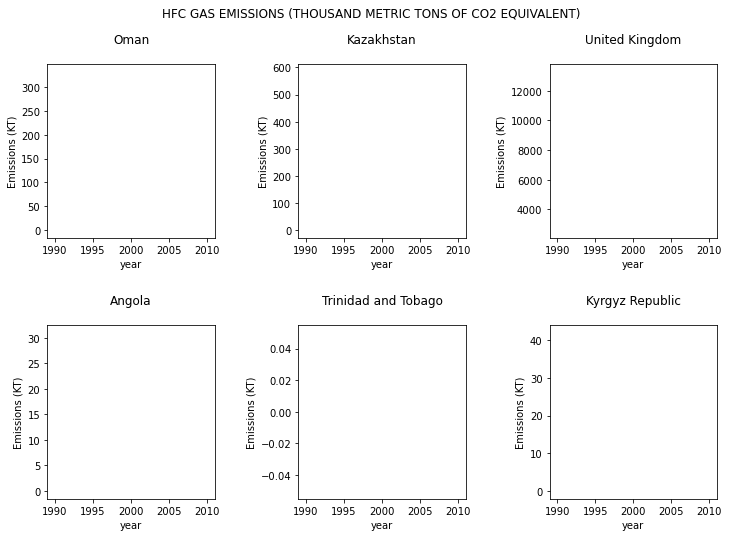

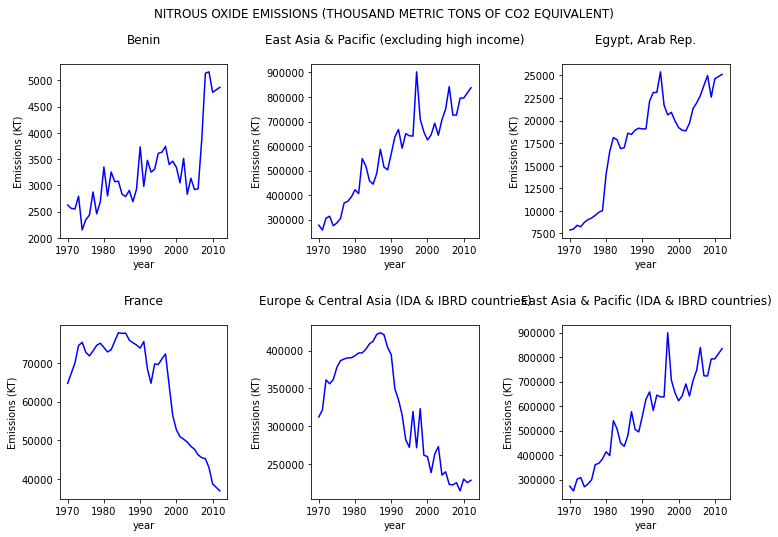

In [59]:
colores = ["r","g","b","k","r","g","b"]
for i in range(len(files)):
    datos = pd.read_csv(files[i]).copy() # copia para evitar modificar los archivos
    graficar(datos, graficas = (2,3), dimfig = (12,8), color = colores[i])
    print("\n\n")

Notar que los graficos de las emisiones de HFC generalmente estan vacios, esto debido a que los HFC se producen en un número reducido de paises.

Se tomó una muestra aleatoria por lo que es poco probable que suceda la condición mencionada previamente. (**ver archivo HFC_eq_CO_KT.csv**)

**Nota Importante:**

A partir de los gráficos se extrapola que las emisiones de los GEI y combustibles fluctuan de manera considerable cada año por lo que se procedió a buscar una tendencia a nivel global.

In [183]:

print(cols)


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')


,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020


## Análisis a nivel mundial de las emisiones

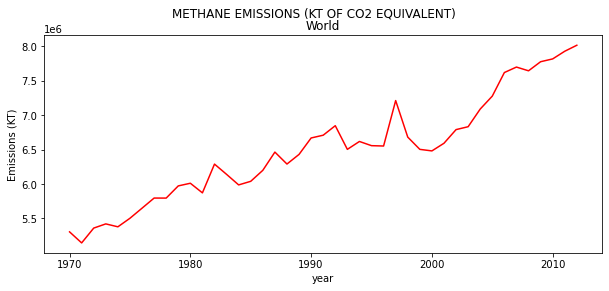

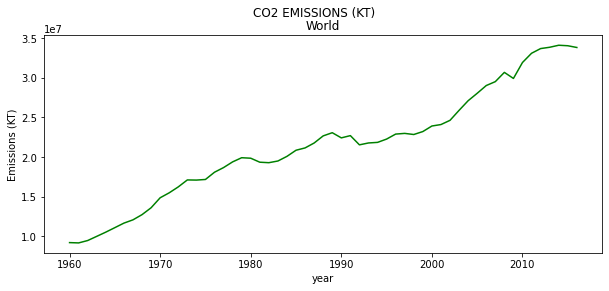

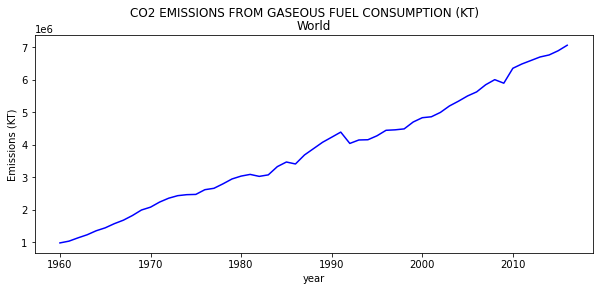

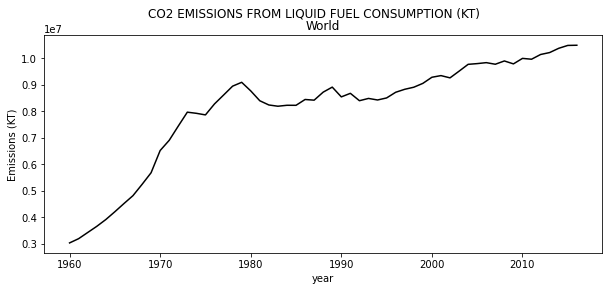

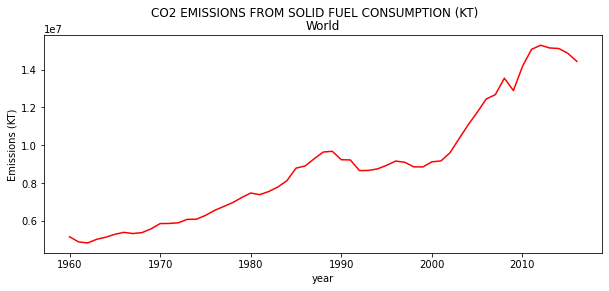

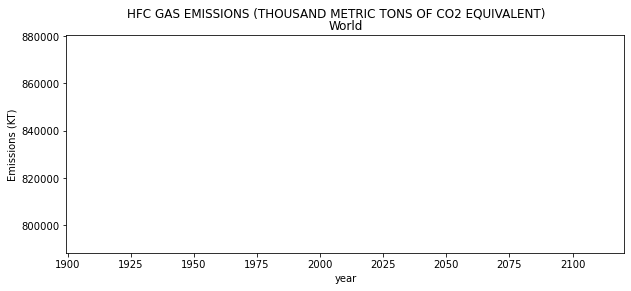

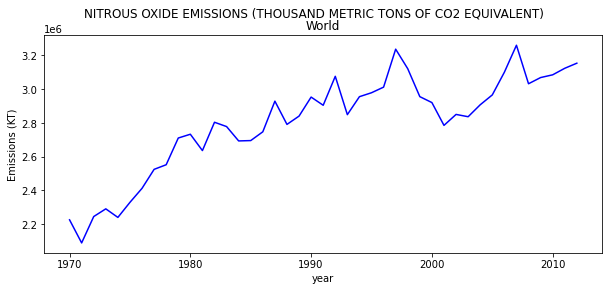

In [60]:
n_arc = range(len(files))
cols = pd.read_csv(files[0]).columns
n_arc = range(len(files))
emision = []

for i in n_arc:
    emision.append(mundo(files[i], size= (10,4),col = colores[i], dev_dat  = True)[2:])

A nivel mundial se observa una alza en las emisiones de los gases de efecto invernadero. Ademas,se extrapola que el patron que siguen es aproximadamente lineal.

In [61]:
tabla_mundo = pd.DataFrame(emision,columns=cols[2:])
tabla_mundo

,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.927061e+06,8.014067e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CO2 emissions (kt),EN.ATM.CO2E.KT,9.213448e+06,9174599.225,9475006.614,1.000266e+07,1.053397e+07,1.110089e+07,1.167114e+07,1.208492e+07,...,3.309076e+07,3.368361e+07,3.384827e+07,3.410319e+07,3.404067e+07,3.381940e+07,NaN,NaN,NaN,NaN
2,CO2 emissions from gaseous fuel consumption (kt),EN.ATM.CO2E.GF.KT,9.750710e+05,1029718.040,1131368.839,1.225206e+06,1.348666e+06,1.439241e+06,1.566722e+06,1.673974e+06,...,6.480916e+06,6.587834e+06,6.695603e+06,6.757743e+06,6.887192e+06,7.056781e+06,NaN,NaN,NaN,NaN
3,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,3.025727e+06,3185843.447,3418102.616,3.649872e+06,3.906880e+06,4.201792e+06,4.509446e+06,4.808931e+06,...,9.955128e+06,1.013381e+07,1.020665e+07,1.036714e+07,1.047556e+07,1.048250e+07,NaN,NaN,NaN,NaN
4,CO2 emissions from solid fuel consumption (kt),EN.ATM.CO2E.SF.KT,5.146913e+06,4872471.662,4821306.724,5.013086e+06,5.122991e+06,5.277056e+06,5.380882e+06,5.317250e+06,...,1.507413e+07,1.529133e+07,1.514706e+07,1.511932e+07,1.486756e+07,1.443759e+07,NaN,NaN,NaN,NaN
5,HFC gas emissions (thousand metric tons of CO2...,EN.ATM.HFCG.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.123551e+06,3.153742e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Regresión Lineal sobre los datos para predicción de emisiones futuras

In [68]:
def regresion(data):
    data = np.array(data)[:,2:].astype(float)
    year = np.arange(len(data[0][:])) + 1960
    coef = []
   
    for dat in data:    
        mascara = np.isfinite(dat)
        lineal = np.polyfit(year[mascara], dat[mascara],1)
        coef.append(lineal)

    return coef

In [69]:
coef = regresion(emision)

<ipython-input-69-277f0610c9f7>:1: RankWarning: Polyfit may be poorly conditioned
  coef = regresion(emision)


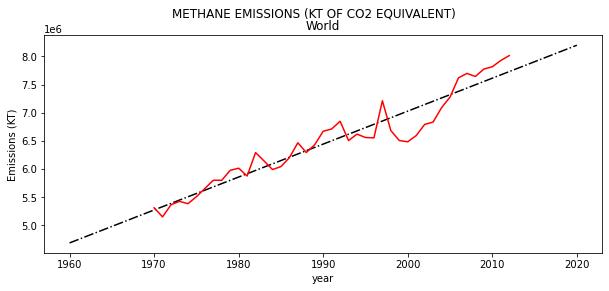

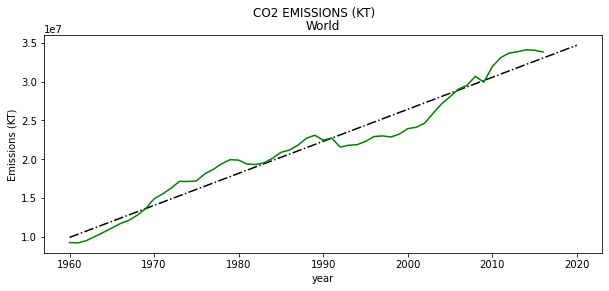

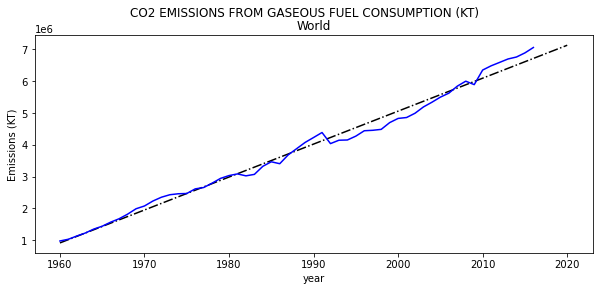

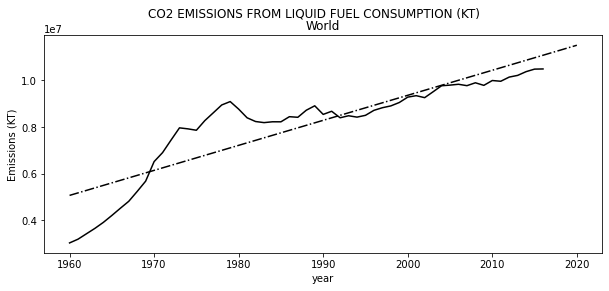

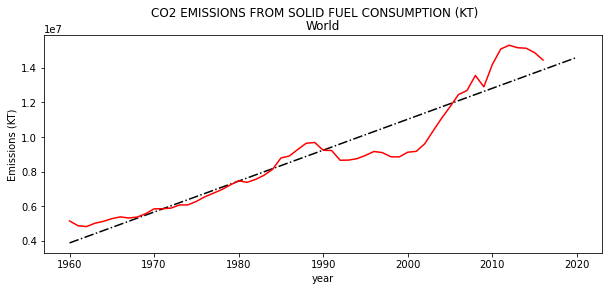

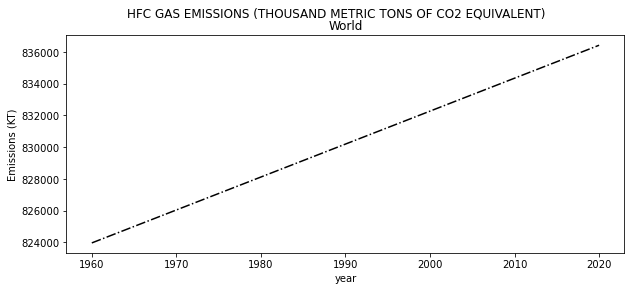

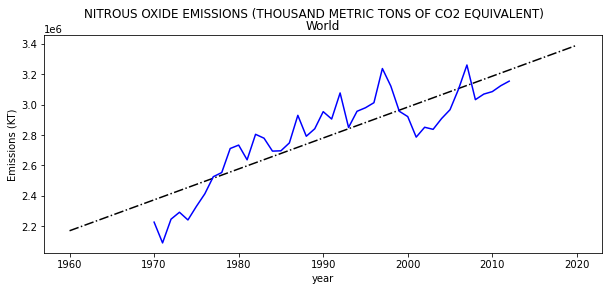

In [79]:
year = np.arange(len(emision[0][2:])) + 1960
for i in range(len(files)):
    mundo(files[i], size= (10,4),col = colores[i], ab = coef[i])

#### Extrapolación de emisiones

In [115]:
def prediccion(year, coef):
    
    if year > 2020:
        print("**Global Emissions**\n")
        dat = []
        for i in range(len(emision)):
            a, b = coef[i]
            fun = lambda x: a * x + b
            dat.append([emision[i][0], fun(year)])
        dat = np.array(dat)
        return pd.DataFrame(dat[:,1], index=dat[:,0], columns = [f"{year}"])
    else:
        print("No se ha extrapolado")
        
    

In [116]:
prediccion(2030, coef)

**Global Emissions**



,2030
Methane emissions (kt of CO2 equivalent),8784944.164490491
CO2 emissions (kt),38820066.759365916
CO2 emissions from gaseous fuel consumption (kt),8162933.4852053225
CO2 emissions from liquid fuel consumption (kt),12571446.234942913
CO2 emissions from solid fuel consumption (kt),16375417.970057607
HFC gas emissions (thousand metric tons of CO2 equivalent),838496.5478089548
Nitrous oxide emissions (thousand metric tons of CO2 equivalent),3593508.038125187
